In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("./netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# data pre-processing

def check_data():
    print("###Check the type")
    print(df.dtypes)
    
    print("###Check missing values")
    print(df.isnull().sum())
#     print(df.isna().sum())
    
    print("###Generate descriptive statistics")
    print(df.describe().T)
    
    print("###Check duplicate values")
    print(df.duplicated().sum())
    
    
check_data()

###Check the type
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
###Check missing values
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
###Generate descriptive statistics
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0  
###Check duplicate values
0


In [6]:
# remove null values
df.dropna(inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [8]:
# analyse the number of different types
types =  df['type'].value_counts()
types

Movie      5185
TV Show     147
Name: type, dtype: int64

In [9]:

top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_movie

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,11
8,Don Michael Paul,10
9,David Dhawan,9


In [10]:
top_10_directors_TVShow = df['director'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_TVShow

,index,director
0,Alastair Fothergill,3
1,Iginio Straffi,2
2,Rob Seidenglanz,2
3,Shin Won-ho,2
4,Stan Lathan,2
5,Simon Frederick,1
6,Daniel Minahan,1
7,Takuya Igarashi,1
8,Ally Pankiw,1
9,Jay Oliva,1


In [11]:
top_10_countries_movie = df['country'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_movie

,index,country
0,United States,1819
1,India,868
2,United Kingdom,164
3,Canada,104
4,Egypt,90
5,Nigeria,84
6,Spain,84
7,Indonesia,76
8,Turkey,74
9,Japan,73


In [12]:
top_10_countries_TV = df['country'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_TV

,index,country
0,United States,27
1,United Kingdom,19
2,Japan,10
3,South Korea,10
4,Spain,7
5,India,7
6,Taiwan,7
7,France,5
8,Turkey,5
9,Thailand,5


In [13]:
# which year added the most movies?

yearly_counts_movie = df['release_year'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
yearly_counts_movie

,index,release_year
0,2017,640
1,2018,632
2,2016,567
3,2019,495
4,2020,409
5,2015,340
6,2014,234
7,2013,195
8,2012,159
9,2021,146


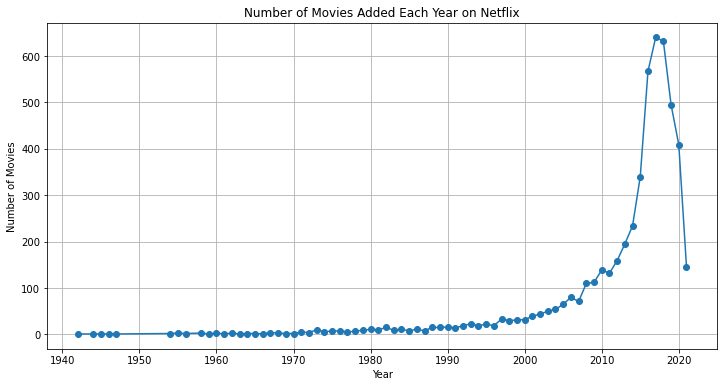

In [14]:
# calculate the number of movie each year
yearly_counts_movie = df[df['type'] == 'Movie'].groupby('release_year').size()

# change data type to interger
yearly_counts_movie.index = yearly_counts_movie.index.map(int)

# sort by year
yearly_counts_movie = yearly_counts_movie.sort_index()

plt.figure(figsize=(12, 6))
yearly_counts_movie.plot(kind='line', marker='o')
plt.title('Number of Movies Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [15]:
# which year added the most TV shows?

yearly_counts_TV = df['release_year'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
yearly_counts_TV

,index,release_year
0,2020,33
1,2019,24
2,2017,17
3,2018,16
4,2021,15
5,2016,10
6,2015,9
7,2014,8
8,2012,4
9,2011,3


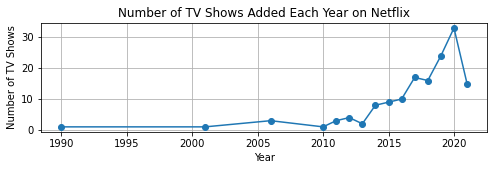

In [16]:
# calculate the number of Tv shows each year
yearly_counts_TV = df[df['type'] == 'TV Show'].groupby('release_year').size()

# change data type to interger
yearly_counts_TV.index = yearly_counts_TV.index.map(int)

# sort by year
yearly_counts_TV = yearly_counts_TV.sort_index()

plt.figure(figsize=(8, 2))
yearly_counts_TV.plot(kind='line', marker='o')
plt.title('Number of TV Shows Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.grid(True)
plt.show()

In [17]:
listed_in =  df['listed_in'].value_counts()
listed_in

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 335, dtype: int64

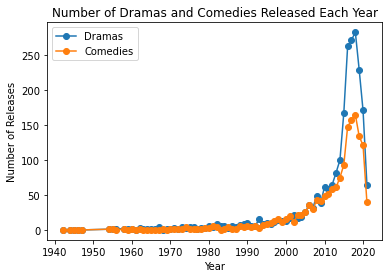

In [18]:
# split listed_in
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(', '))

# explode
df_exploded = df.explode('listed_in')

# 按年份和流派分组，计算每年每个流派的内容数量 
# calculate every list's content in each year
genre_yearly_counts = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Pivot表格以年份为行，流派为列，内容数量为值
pivot_table = genre_yearly_counts.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# 选择一个或几个特定流派进行可视化
pivot_table[['Dramas', 'Comedies']].plot(kind='line', marker='o')
plt.title('Number of Dramas and Comedies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()


# LDA 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Increase the number of features in TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Setup LDA with GridSearch to find the optimal number of topics
search_params = {'n_components': [5, 10, 15, 20], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params,n_jobs=4)
model.fit(tfidf_matrix)

best_lda_model = model.best_estimator_
print("Best Model's Params: ", model.best_params_)

In [38]:
# use LDA model analyse words in description

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# Re-initializing TF-IDF Vectorizer and applying it to the descriptions
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Re-defining and fitting the LDA model
# defining n_top_words
n_top_words = 10
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, learning_decay=0.9,random_state=0)
lda.fit(tfidf_matrix)

# Extracting and displaying words associated with topics
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_words = {topic: [feature_names[i] for i in comp.argsort()[:-n_top_words - 1:-1]] for topic, comp in enumerate(lda.components_)}

topic_words

{0: ['documentary',
  'daughter',
  'town',
  'crime',
  'mysterious',
  'american',
  'city',
  'police',
  'cop',
  'set'],
 1: ['love',
  'finds',
  'life',
  'school',
  'high',
  'girl',
  'family',
  'falls',
  'murder',
  'student'],
 2: ['young',
  'woman',
  'father',
  'man',
  'new',
  'son',
  'special',
  'wife',
  'home',
  'team'],
 3: ['old',
  'friends',
  'year',
  'friend',
  'way',
  'begins',
  'teen',
  'returns',
  'best',
  'comic'],
 4: ['world',
  'group',
  'lives',
  'save',
  'soon',
  'time',
  'story',
  'true',
  'secret',
  'make']}

# NLP - data preprocessing

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Process the 'listed_in' column to understand the distribution of labels

# Using MultiLabelBinarizer to transform the labels into a binary matrix
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df['listed_in'])

# Checking the distribution of labels
label_counts = np.sum(labels, axis=0)

# Create a DataFrame for better visualization of label distribution
label_distribution = pd.DataFrame({'Label': mlb.classes_, 'Count': label_counts})

# Display the distribution and some general stats
label_distribution_sorted = label_distribution.sort_values('Count', ascending=False)
general_stats = {
    'Total Samples': df.shape[0],
    'Total Labels': len(mlb.classes_),
    'Labels Per Sample': labels.shape[1],
    'Samples with Multiple Labels': np.sum(np.sum(labels, axis=1) > 1)
}

label_distribution_sorted.head(), general_stats


(                   Label  Count
 16  International Movies   2369
 12                Dramas   2293
 7               Comedies   1553
 0     Action & Adventure    806
 15    Independent Movies    740,
 {'Total Samples': 5332,
  'Total Labels': 42,
  'Labels Per Sample': 42,
  'Samples with Multiple Labels': 4231})

# Multi-label classification - SVM

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(SVC(probability=True))),
])

# Using a small grid for example purposes
parameter_grid = {
    'tfidf__max_features': (1000, 5000),
    'clf__estimator__C': [0.1, 1, 10],
    'clf__estimator__kernel': ['linear', 'rbf']
}
X_train, X_test, y_train, y_test = train_test_split(df['description'], labels, test_size=0.2, random_state=42)

grid_search_tune = GridSearchCV(pipeline, parameter_grid, cv=2, n_jobs=4, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A Nu

[CV 2/2] END clf__estimator__C=0.1, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.005 total time=  20.3s
[CV 1/2] END clf__estimator__C=0.1, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.008 total time=  20.4s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=0.1, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.000 total time=  40.5s
[CV 1/2] END clf__estimator__C=0.1, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.000 total time=  41.0s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=0.1, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.000 total time=  38.7s
[CV 1/2] END clf__estimator__C=0.1, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.000 total time=  39.6s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 1/2] END clf__estimator__C=1, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.112 total time=  17.9s
[CV 2/2] END clf__estimator__C=1, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.115 total time=  17.6s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=1, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.116 total time=  40.3s
[CV 1/2] END clf__estimator__C=1, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.113 total time=  40.8s
[CV 2/2] END clf__estimator__C=0.1, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.000 total time= 1.3min
[CV 1/2] END clf__estimator__C=0.1, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.000 total time= 1.3min


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=1, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.084 total time=  43.1s
[CV 1/2] END clf__estimator__C=1, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.088 total time=  44.1s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 1/2] END clf__estimator__C=10, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.096 total time=  20.5s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=10, clf__estimator__kernel=linear, tfidf__max_features=1000;, score=0.081 total time=  20.3s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(


[CV 1/2] END clf__estimator__C=1, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.060 total time= 1.5min
[CV 2/2] END clf__estimator__C=1, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.061 total time= 1.5min


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 1/2] END clf__estimator__C=10, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.113 total time=  41.7s
[CV 2/2] END clf__estimator__C=10, clf__estimator__kernel=linear, tfidf__max_features=5000;, score=0.110 total time=  41.4s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=10, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.118 total time=  46.6s
[CV 1/2] END clf__estimator__C=10, clf__estimator__kernel=rbf, tfidf__max_features=1000;, score=0.123 total time=  47.7s


/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/Users/ash/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(


[CV 2/2] END clf__estimator__C=10, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.103 total time= 1.4min
[CV 1/2] END clf__estimator__C=10, clf__estimator__kernel=rbf, tfidf__max_features=5000;, score=0.099 total time= 1.4min
Best parameters set:
[('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')), ('clf', OneVsRestClassifier(estimator=SVC(C=10, probability=True)))]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score


tfidf_vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')  # 限制为1000个最重要的特征

X_train, X_test, y_train, y_test = train_test_split(df['description'], labels, test_size=0.2, random_state=42)

model = make_pipeline(tfidf_vectorizer, OneVsRestClassifier(SVC(kernel='rbf', C=10, probability=True)))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')  

accuracy, f1


(0.1218369259606373, 0.4651038891848695)

# Multi-label classification - CNN


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['description'])
sequences = tokenizer.texts_to_sequences(df['description'])
X_processed = pad_sequences(sequences, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X_processed, labels, test_size=0.2, random_state=42)


# Assuming y_train is a binary encoded multilabel matrix of shape (n_samples, n_classes)
n_classes = y_train.shape[1]
class_weights = {}

for i in range(n_classes):
    # Compute class weights for each label
    weights = compute_class_weight(class_weight='balanced',
                                   classes=np.unique(y_train[:, i]),
                                   y=y_train[:, i])
    class_weights[i] = {0: weights[0], 1: weights[1]}

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))  # Increased output_dim
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))  # Adding MaxPooling for dimensionality reduction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))  # Additional Conv1D layer
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(len(mlb.classes_), activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

sample_weights = np.ones(shape=(len(y_train),))

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, sample_weight=sample_weights)



Epoch 1/10
120/120 [==============================] - 3s 17ms/step - loss: 0.3681 - accuracy: 0.1214 - val_loss: 0.1834 - val_accuracy: 0.2553
Epoch 2/10
120/120 [==============================] - 2s 16ms/step - loss: 0.1785 - accuracy: 0.1467 - val_loss: 0.1585 - val_accuracy: 0.2553
Epoch 3/10
120/120 [==============================] - 2s 18ms/step - loss: 0.1604 - accuracy: 0.1464 - val_loss: 0.1521 - val_accuracy: 0.2553
Epoch 4/10
120/120 [==============================] - 2s 19ms/step - loss: 0.1535 - accuracy: 0.1519 - val_loss: 0.1482 - val_accuracy: 0.0328
Epoch 5/10
120/120 [==============================] - 2s 19ms/step - loss: 0.1500 - accuracy: 0.1514 - val_loss: 0.1479 - val_accuracy: 0.0328
Epoch 6/10
120/120 [==============================] - 2s 18ms/step - loss: 0.1480 - accuracy: 0.1376 - val_loss: 0.1449 - val_accuracy: 0.0328
Epoch 7/10
120/120 [==============================] - 2s 19ms/step - loss: 0.1461 - accuracy: 0.1402 - val_loss: 0.1441 - val_accuracy: 0.0328